<h2>Loan Approval Prediction using Logistic Regression Algorithm.</h2>
<h4>Import required libraries : Pandas, Numpy for data extraction, manipulations, Matplotlib, Seaborn for plotting</h4>
<h4>Import function, class : train_test_split for data splitting, LogisticRegression Class to use the algorithm.</h4>
<h4>Import class : LabelEncoder for encoding strings to numbers.</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

<h4>Load the loan data from the source into dataframe object : (I found this data on Github)</h4>

In [2]:
url = "https://raw.githubusercontent.com/callxpert/datasets/master/Loan-applicant-details.csv"
names = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
loandata = pd.read_csv(url, names=names)

<h4>Take a brief look at the data & it's dimensions</h4>

In [3]:
loandata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y


In [4]:
loandata.shape

(480, 12)

<h4>Check the features types of the data.</h4>

In [5]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, LP001003 to LP002990
Data columns (total 12 columns):
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null int64
Loan_Amount_Term     480 non-null int64
Credit_History       480 non-null int64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 48.8+ KB


<h4>Look the measures of central tendency, spread & Five-Number Summary of the data</h4>

In [6]:
loandata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


<h4>Check for missing values in it.</h4>

In [7]:
loandata.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h4>Here, we can see categorical columns like gender, married, education, self employed,property area & loan status are there in strings.</h4>
<h4>We should convert them to numbers to work with model.</h4>
<h4>I am using a class LabelEncoder from sklearn's preprocessing module.</h4>

In [8]:
LE = LabelEncoder()
CatColumns = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for i in CatColumns:
    loandata[i] = LE.fit_transform(loandata[i])

In [9]:
loandata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001003,1,1,1,0,0,4583,1508.0,128,360,1,0,0
LP001005,1,1,0,0,1,3000,0.0,66,360,1,2,1
LP001006,1,1,0,1,0,2583,2358.0,120,360,1,2,1
LP001008,1,0,0,0,0,6000,0.0,141,360,1,2,1
LP001011,1,1,2,0,1,5417,4196.0,267,360,1,2,1


<h4>Features after encoding :</h4>
<table align="left">
    <tr>
        <th>Gender</th>
    </tr>
    <tr>
        <td>Male</td>
        <td>1</td>
    </tr>
    <tr>
        <td>Female</td>
        <td>0</td>
    </tr>
</table>
<table align="left">
    <tr>
        <th>Married</th>
    </tr>
    <tr>
        <td>Yes</td>
        <td>1</td>
    </tr>
    <tr>
        <td>No</td>
        <td>0</td>
    </tr>
</table>
<table align="left">
    <tr>
        <th>Education</th>
    </tr>
    <tr>
        <td>Not Graduate</td>
        <td>1</td>
    </tr>
    <tr>
        <td>Graduate</td>
        <td>0</td>
    </tr>
</table>
<table align="left">
    <tr>
        <th>Self Employed</th>
    </tr>
    <tr>
        <td>Yes</td>
        <td>1</td>
    </tr>
    <tr>
        <td>No</td>
        <td>0</td>
    </tr>
</table>
<table align="left">
    <tr>
        <th>Property Area</th>
    </tr>
    <tr>
        <td>Urban</td>
        <td>2</td>
    </tr>
    <tr>
        <td>Semi Urban</td>
        <td>1</td>
    </tr>
    <tr>
        <td>Rural</td>
        <td>0</td>
    </tr>
</table>
<table align="left">
    <tr>
        <th>Loan Status</th>
    </tr>
    <tr>
        <td>Yes</td>
        <td>1</td>
    </tr>
    <tr>
        <td>No</td>
        <td>0</td>
    </tr>
</table>

<h4>Visualize & Understand the data counts, frequency distributions, correlations</h4>

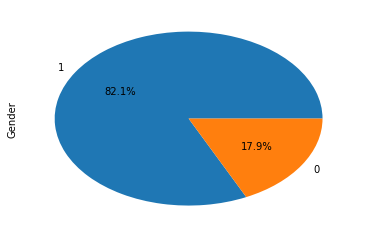

In [10]:
loandata.Gender.value_counts().plot.pie(autopct = "%1.1f%%")

In [11]:
loandata.Gender.value_counts()

1    394
0     86
Name: Gender, dtype: int64

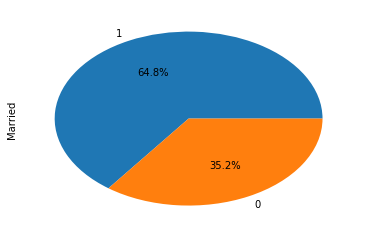

In [12]:
loandata.Married.value_counts().plot.pie(autopct = "%1.1f%%")

In [13]:
loandata.Married.value_counts()

1    311
0    169
Name: Married, dtype: int64

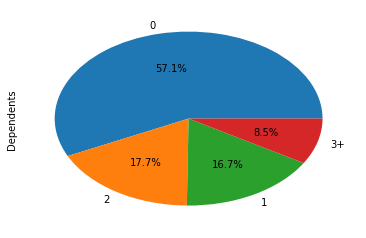

In [14]:
loandata.Dependents.value_counts().plot.pie(autopct = "%1.1f%%")

In [15]:
loandata.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

<h4>Convert/Encode Dependents feature '3+' to simply 3 for simplicity. </h4>

In [16]:
loandata.Dependents = LE.fit_transform(loandata.Dependents)
loandata.Dependents.value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

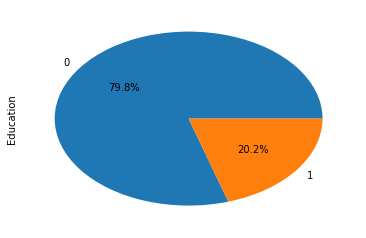

In [17]:
loandata.Education.value_counts().plot.pie(autopct = "%1.1f%%")

In [18]:
loandata.Education.value_counts()

0    383
1     97
Name: Education, dtype: int64

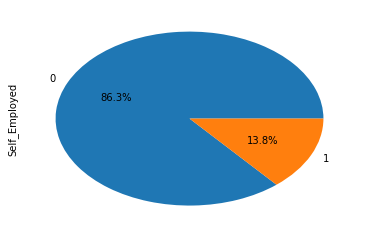

In [19]:
loandata.Self_Employed.value_counts().plot.pie(autopct = "%1.1f%%")

In [20]:
loandata.Self_Employed.value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

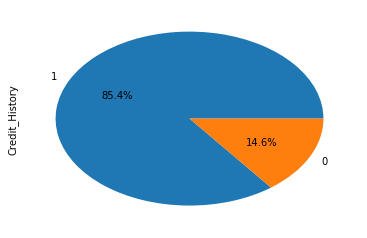

In [21]:
loandata.Credit_History.value_counts().plot.pie(autopct = "%1.1f%%")

In [22]:
loandata.Credit_History.value_counts()

1    410
0     70
Name: Credit_History, dtype: int64

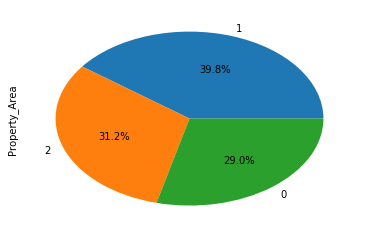

In [23]:
loandata.Property_Area.value_counts().plot.pie(autopct = "%1.1f%%")

In [24]:
loandata.Property_Area.value_counts()

1    191
2    150
0    139
Name: Property_Area, dtype: int64

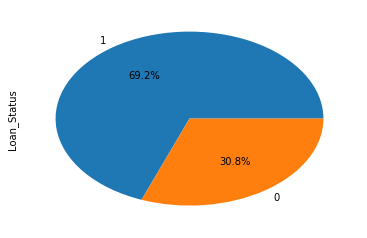

In [25]:
loandata.Loan_Status.value_counts().plot.pie(autopct = "%1.1f%%")

In [26]:
loandata.Loan_Status.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

<h4>From the pie chart, we can conclude that most of the loan applicants are male, they are married, have no dependents, are graduates.</h4>
<h4>Most of the applicants are not self-employed, they may live in semi-urban locations or have properties in semi-urban locations.</h4>

<h4>Here, features like Applicant Income, Co-Applicant Income, Loan Amount, Loan Amount Term are highly varying with other features - categorical.</h4> 
<h4>So we can scale these features to bring all features at almost same level of magnitudes and/or ranges.</h4>

In [27]:
#scaledloandata = loandata.iloc[:,[5,6,7,8]]

In [28]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#scaledloandata = pd.DataFrame(sc.fit_transform(scaledloandata))



In [29]:
#scaledloandata.head()

In [30]:
#loandata.iloc[:,[5,6,7,8]].head()

<h4>Replace the scaled data into original data</h4>

In [31]:
#loandata.iloc[:,[5,6,7,8]] = scaledloandata.values

In [32]:
loandata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001003,1,1,1,0,0,4583,1508.0,128,360,1,0,0
LP001005,1,1,0,0,1,3000,0.0,66,360,1,2,1
LP001006,1,1,0,1,0,2583,2358.0,120,360,1,2,1
LP001008,1,0,0,0,0,6000,0.0,141,360,1,2,1
LP001011,1,1,2,0,1,5417,4196.0,267,360,1,2,1


<h4>Verify the data is replaced correctly or not.</h4>

In [33]:
loandata.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h4>We should check the Five Number Plot to detect the outliers.</h4>

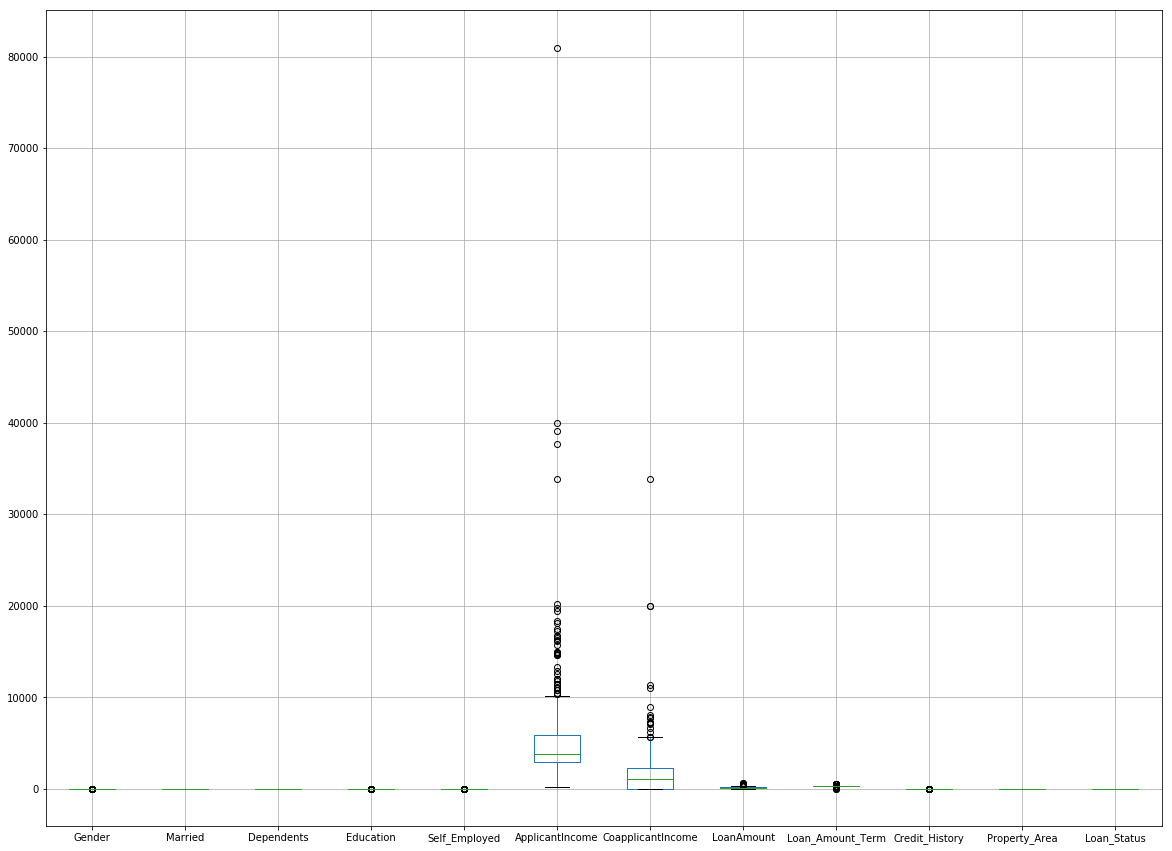

In [34]:
plt.figure(figsize=(20,15))
loandata.boxplot()

<h4>From the boxplots, we can see features like Applicant Income, CO-Applicant Income, Loan Amount, Loan Amount Term have lots of outliers.</h4>
<h4>Further more, histograms of these features also can say about the outliers.</h4>

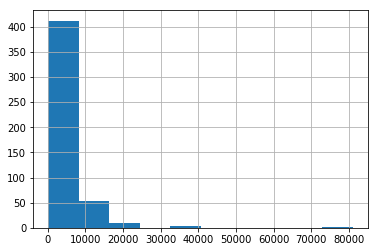

In [35]:
loandata.ApplicantIncome.hist()

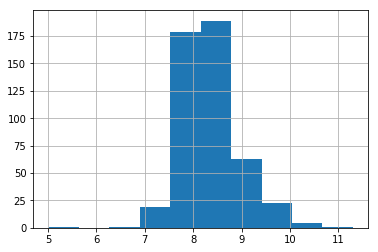

In [36]:
np.log(loandata.ApplicantIncome).hist()

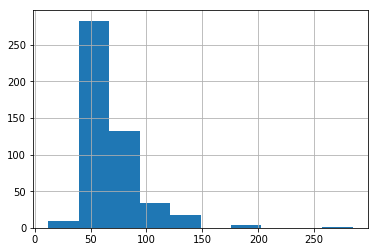

In [37]:
np.sqrt(loandata.ApplicantIncome).hist()

In [39]:
loandata.ApplicantIncome.isnull().sum()

0

<h4>Techiniques like log, exp, sqrt can be used to make the distribution normal.</h4>
<h4>Here, taking log of Applicant Income gives the best normal distribution compared to exp & sqrt, so we will apply log to that feature.</h4>

In [40]:
loandata.ApplicantIncome.head()

LP001003    4583
LP001005    3000
LP001006    2583
LP001008    6000
LP001011    5417
Name: ApplicantIncome, dtype: int64

In [41]:
loandata.ApplicantIncome = np.log(loandata.ApplicantIncome)

In [42]:
loandata.ApplicantIncome.head()

LP001003    8.430109
LP001005    8.006368
LP001006    7.856707
LP001008    8.699515
LP001011    8.597297
Name: ApplicantIncome, dtype: float64

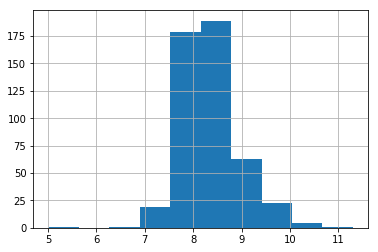

In [43]:
loandata.ApplicantIncome.hist()

<h4>Similarly, we will choose the best distribution for rest of the outliers containing features.</h4>

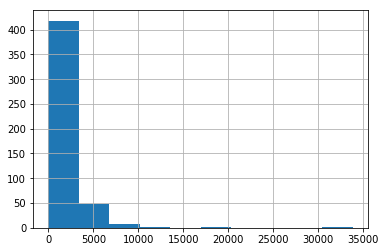

In [50]:
loandata.CoapplicantIncome.hist()

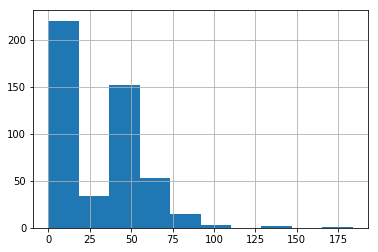

In [54]:
np.sqrt(loandata.CoapplicantIncome).hist()

<h4>Here, in the above feature, exp & log are not working due to finite range issue (The feature may contain 0 value).</h4>
<h4>So, we will use sqrt.</h4>

In [55]:
loandata.CoapplicantIncome.head()

LP001003    1508.0
LP001005       0.0
LP001006    2358.0
LP001008       0.0
LP001011    4196.0
Name: CoapplicantIncome, dtype: float64

In [56]:
loandata.CoapplicantIncome = np.sqrt(loandata.CoapplicantIncome)

In [57]:
loandata.CoapplicantIncome.head()

LP001003    38.832976
LP001005     0.000000
LP001006    48.559242
LP001008     0.000000
LP001011    64.776539
Name: CoapplicantIncome, dtype: float64

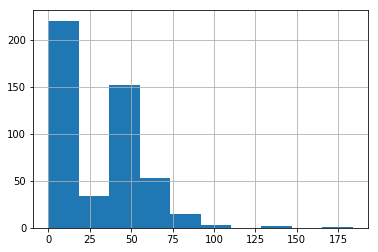

In [58]:
loandata.CoapplicantIncome.hist()

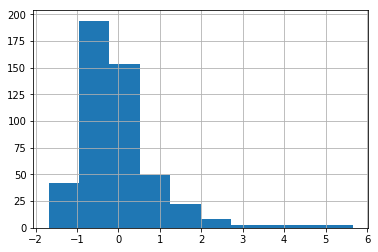

In [37]:
loandata.LoanAmount.hist()

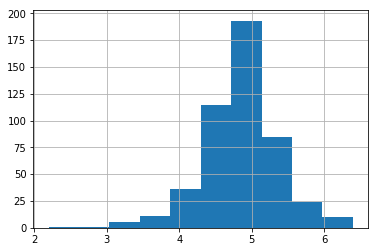

In [59]:
np.log(loandata.LoanAmount).hist()

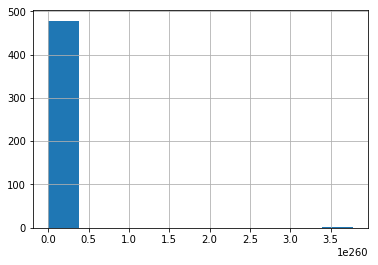

In [60]:
np.exp(loandata.LoanAmount).hist()

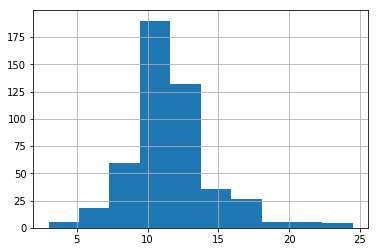

In [61]:
np.sqrt(loandata.LoanAmount).hist()

In [62]:
loandata.LoanAmount.head()

LP001003    128
LP001005     66
LP001006    120
LP001008    141
LP001011    267
Name: LoanAmount, dtype: int64

In [63]:
loandata.LoanAmount = np.sqrt(loandata.LoanAmount)

In [64]:
loandata.LoanAmount.head()

LP001003    11.313708
LP001005     8.124038
LP001006    10.954451
LP001008    11.874342
LP001011    16.340135
Name: LoanAmount, dtype: float64

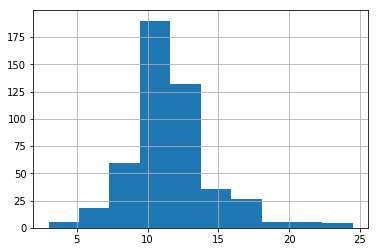

In [65]:
loandata.LoanAmount.hist()

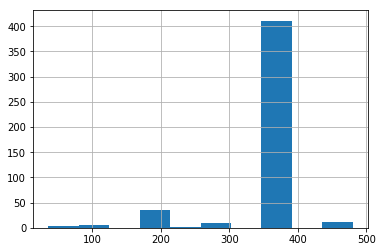

In [66]:
loandata.Loan_Amount_Term.hist()

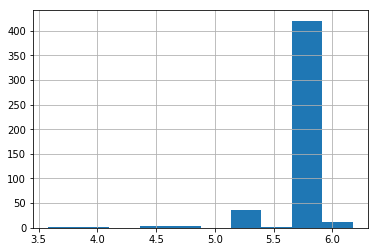

In [67]:
np.log(loandata.Loan_Amount_Term).hist()

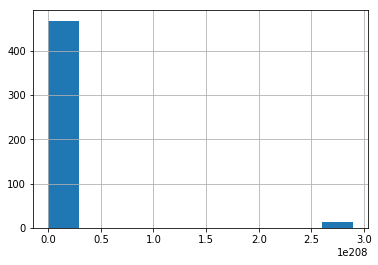

In [68]:
np.exp(loandata.Loan_Amount_Term).hist()

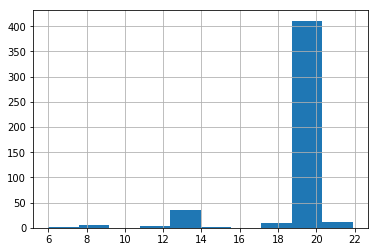

In [69]:
np.sqrt(loandata.Loan_Amount_Term).hist()

In [74]:
loandata.Loan_Amount_Term.head()

LP001003    360
LP001005    360
LP001006    360
LP001008    360
LP001011    360
Name: Loan_Amount_Term, dtype: int64

In [75]:
loandata.Loan_Amount_Term = np.sqrt(loandata.Loan_Amount_Term)

In [76]:
loandata.Loan_Amount_Term.head()

LP001003    18.973666
LP001005    18.973666
LP001006    18.973666
LP001008    18.973666
LP001011    18.973666
Name: Loan_Amount_Term, dtype: float64

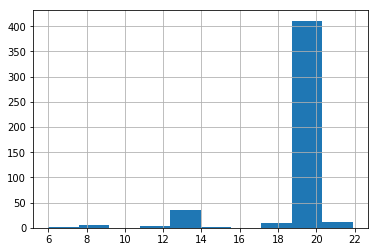

In [77]:
loandata.Loan_Amount_Term.hist()

In [78]:
loandata.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h4>Now, we can split data into training & testing sets. For that we must divide the input features & target label.</h4>

In [84]:
x = loandata.iloc[:,:-1]

In [85]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
LP001003,1,1,1,0,0,8.430109,38.832976,11.313708,18.973666,1,0
LP001005,1,1,0,0,1,8.006368,0.000000,8.124038,18.973666,1,2
LP001006,1,1,0,1,0,7.856707,48.559242,10.954451,18.973666,1,2
LP001008,1,0,0,0,0,8.699515,0.000000,11.874342,18.973666,1,2
LP001011,1,1,2,0,1,8.597297,64.776539,16.340135,18.973666,1,2


In [86]:
y = loandata.iloc[:,-1:]

In [87]:
y.head()

,Loan_Status
LP001003,0
LP001005,1
LP001006,1
LP001008,1
LP001011,1


In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=42)

<h4>Ok, so now the data is splitted. Now its SHOW TIME!!</h4>
<h4>So we will train our data into Logistic Regression (It is classifier algorithm) & check the score/accuracy of the trained model.</h4>

In [89]:
modelLR= LogisticRegression()
modelLR.fit(x_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
modelLR.score(x_test,y_test)

0.7916666666666666

In [91]:
modelLR.score(x_train,y_train)

0.8111111111111111

<h4>Just to check/compare the predictions & actual data points, we will predict some rows of x_test.</h4>

In [93]:
x_test.shape

(120, 11)

In [94]:
x_test.iloc[60:65]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
LP002936,1,1,0,0,0,8.258163,57.445626,11.916375,13.416408,1,0
LP002065,1,1,3,0,0,9.615805,0.000000,17.320508,18.973666,1,0
LP001334,1,1,0,1,0,8.339979,0.000000,10.723805,13.416408,1,1
LP001610,1,1,3,0,0,8.615408,106.301458,22.248595,18.973666,0,1
LP001953,1,1,1,0,0,8.835647,0.000000,14.142136,18.973666,1,1


In [99]:
y_test.iloc[60:65]

,Loan_Status
LP002936,1
LP002065,1
LP001334,1
LP001610,0
LP001953,1


In [100]:
modelLR.predict(x_test.iloc[60:65])

array([1, 1, 1, 0, 1], dtype=int64)

<h4>See, the prediction for these above rows is exact.</h4>

<h4>Here, we can check overfitting problem by comparing score of model on both training data & testing data.</h4>
<h4>As we can see here, model's score on training (79 %) & testing data (81%) is very close.</h4>
<h4>So, we can conclude that our model fits perfect for both training & testing data, thus no overfitting is here.</h4>